<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

Привет! Меня зовут Лиза Колесник, я буду делать ревью твоего самостоятельного проекта по исследовательскому анализу данных.
    
<s>Я вижу, что нумерация ячеек кода начинается не с 1, а также код выполнен не по порядку, нумерация путается по всему проекту. Поэтому прошу тебя перед отправкой на проверку перезагрузить ноутбук, выполнив команду `Kernel > Restart & Run All`. И после этого проверить, что все ячейки кода выполняются корректно.
    
Очень жду твоих исправлений, чтобы начать проверку:)  </s>  

</div>


Мне понравился твой проект, ты стараешься аккуратно обработать данные, без проблем их визуализируешь и делаешь грамотные выводы. Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я приняла проект. 
</div>
<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь сделать немного по другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом. Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.

---

<div class="alert alert-info">
    <strong>Ссылка на цикл с даграммами чтобы долго не искать :)</strong> </div>

[Ссылка на цикл с даграммами чтобы долго не искать :)](#cell1)

<div class="alert alert-info">
    <strong>Ок спасибо, мой цвет пусть будет синий</strong> </div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/datasets/real_estate_data.csv')
df.head()




,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


###  сколько отображать в строк и столбцов в таблице

In [5]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




### Данные склеились разбиваем их по символу табуляции

In [6]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-info">
    <strong>Испытаем проверялку из семинара, бибилиотека не загружена тут не работает</strong> </div>

In [7]:
#from pandas_profiling import ProfileReport 
#ProfileReport(df) 

In [8]:
#df[df['days_exposition'] == 95]

### Проверяем назваине колонок,  все в порядке, лишних пропусков нет

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'], dtype='object')

### Проверяем на дубликаты

In [10]:
df.duplicated().sum()

0

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Молодец, что не забыл про дубли. Обычно еще стоит проводить повторную проверку после всех доработок данных.

</div>

### Смотррим информацию

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Смотрим сколько пропущено 

In [12]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Обнаружено довольнор много пропусков, что возможно  обучсловленно не очень точной или неверной настройкой алгоритма при автоматическом занесении, а также человеческими ошибками при вручном занесении

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Согласна, возможны как и технические проблемы, так и человеческий фактор, хорошо.

</div>

### Шаг 2. Предобработка данных

### Название Города и поселков дано на русском , неплохо бы переименовать их в латиницу, но ячеек слишком много на конечный результат это влияние не окажет поэтому мучиться не будем :)

In [13]:
display(df['locality_name'].value_counts().head(20))

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

In [14]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Приведем название к нижнему регистру, для упрощения работы с ними


In [15]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name']

0            санкт-петербург
1             посёлок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23699, dtype: object

In [16]:
display((df['locality_name'] == 'санкт-петербург').sum())

15721

### Проверяем столбцы на пропуски

In [17]:
display(df.isnull().sum())
display(df.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

<div class="alert alert-info">
    <strong>поверить на количество в таблице</strong> </div>

In [18]:
display((df['locality_name'] == 'санкт-петербург').sum())

15721

### Проверим медианы по питеру, сравним с общими по данным, видим что отличий нет

In [19]:
median_spb_ceiling = df.loc[df['locality_name'] == 'санкт-петербург', 'ceiling_height'].median()
display('Высота потолков- ',median_spb_ceiling)
median_spb_floor = df.loc[df['locality_name'] == 'санкт-петербург', 'floors_total'].median()
display('Этажность- ', median_spb_floor)
median_spb_living_area = df.loc[df['locality_name'] == 'санкт-петербург', 'living_area'].median()
display('Жилая площадь- ', median_spb_living_area)
median_spb_kitchen_area = df.loc[df['locality_name'] == 'санкт-петербург', 'kitchen_area'].median()
display('Площадь кухни- ', median_spb_kitchen_area)
median_spb_days_exposition = df.loc[df['locality_name'] == 'санкт-петербург', 'days_exposition'].median()
print('Сколько дней было размещено объявление- ', median_spb_days_exposition)

'Высота потолков- '

2.7

'Этажность- '

9.0

'Жилая площадь- '

31.3

'Площадь кухни- '

9.9

Сколько дней было размещено объявление-  95.0


### Возможно большинство значений из питера оказывает влияние на общую медиану проверим следующий по количеству поселок мурино

In [20]:
display(df['locality_name'].value_counts().head(40))

санкт-петербург              15721
посёлок мурино                 522
посёлок шушары                 440
всеволожск                     398
пушкин                         369
колпино                        338
посёлок парголово              327
гатчина                        307
деревня кудрово                299
выборг                         237
петергоф                       201
сестрорецк                     183
красное село                   178
кудрово                        173
деревня новое девяткино        144
сертолово                      142
ломоносов                      133
кириши                         125
сланцы                         112
волхов                         111
кингисепп                      104
тосно                          104
кронштадт                       96
никольское                      93
коммунар                        89
сосновый бор                    87
кировск                         84
отрадное                        80
посёлок бугры       

In [21]:
median_murino_ceiling = df.loc[df['locality_name'] == 'посёлок мурино', 'ceiling_height'].median()
display('Высота потолков- ', median_murino_ceiling)
median_murino_floor = df.loc[df['locality_name'] == 'посёлок мурино', 'floors_total'].median()
display('Этажность- ', median_murino_floor)
median_murino_living_area = df.loc[df['locality_name'] == 'посёлок мурино', 'living_area'].median()
display('Жилая площадь- ',median_murino_living_area)
median_murino_kitchen_area = df.loc[df['locality_name'] == 'посёлок мурино', 'kitchen_area'].median()
display('Площадь кухни- ',median_murino_kitchen_area)
median_murino_days_exposition = df.loc[df['locality_name'] == 'посёлок мурино', 'days_exposition'].median()
display('Сколько дней было размещено объявление- ',median_murino_days_exposition)

'Высота потолков- '

2.7

'Этажность- '

19.0

'Жилая площадь- '

17.5

'Площадь кухни- '

10.385

'Сколько дней было размещено объявление- '

72.0

<a id="cell2"></a>
### Прикинем медианы по столбцам 
1. ceiling_height - высота потолков, 
2. floors_total -  всего этажей в доме, 
3. living_area — жилая площадь в квадратных метрах(м²), 
4. kitchen_area — площадь кухни в квадратных метрах (м²), 
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия).  
Заполним медианными значениями, медиана наиболее близка к пропущенным значениям  


**Результат соответствует ожиданиям, аномалий не наблюдается**

In [22]:
#df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Медианная высота потолков - ', df['ceiling_height'].median())

#df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
print('Медианная этажность - ', df['floors_total'].median())

#df['living_area'] = df['living_area'].fillna(df['living_area'].median())
print('Медианная жилая площадь - ', df['living_area'].median())

#df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
print('Медианная площадь кухни  - ', df['kitchen_area'].median())

#df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
print('Медианная количество дней сколько было размещено объявление  - ', df['days_exposition'].median())


display(df.isnull().sum())

Медианная высота потолков -  2.65
Медианная этажность -  9.0
Медианная жилая площадь -  30.0
Медианная площадь кухни  -  9.1
Медианная количество дней сколько было размещено объявление  -  95.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Text(0, 0.5, 'Количество в продаже')

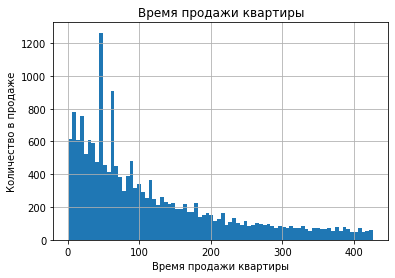

In [23]:
df['days_exposition'].hist(bins=80, range = (1, 427))
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество в продаже')

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Я заметила, что ты выводы шагов оформляешь так же, как и заголовки разделов. Так лучше не делать, это очень путает, когда читаешь проект.

</div>

Итак пропуски в столбцах необходимо заполнять учитывая местоположение квартиры
Перебираем Питер и  поселки. Там где обьявлений больше 50 заменяем пропуски на медиану по поселку,  там где меньше на общую медиану. Цифры 50 взята как менее 5% от общего количества 

In [24]:
#print('Медиана {} {} {:.2f}'.format(city, column, median))
#work_columns = ['ceiling_height', 'floors_total', 'living_area','kitchen_area','days_exposition' ]
#for city in df['locality_name'].unique():
    #for column in work_columns:
#         median = df.loc[df['locality_name'] == city, column].median()
#         if (df['locality_name'] == city).sum()> 50:
#             df.loc[(df[column].isna()) & (df['locality_name'] == city), column] = median
#         else:
#             df[column] = df[column].fillna(df[column].median())


In [25]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Смотри, ты решил пропуски из разных столбцов заполнить, выбирая один способ. Так лучше не делать, чаще всего лучше к каждому столбцу выбрать свой подход. Это необходимо, потому что, например, высота потолков чаще зависит от типа дома (это этажность), жилая площадь может зависеть от общей площади квартиры или от количества комнат, и т.д.. 
    
Когда мы заполняем пропуски, мы восстанавливаем данные. Поэтому нам важно не просто их заполнить, а получить вполне реалистичные данные.
    
Поэтому постарайся внимательнее посмотреть на данные, и заполнить пропуски исходя из зависимости от других параметров.</s>

</div>

<div class="alert alert-info">
    <strong>Согласен наверное я несколько упростил ситуацию
    Проверим что высота потолков зависит от этажности</strong> </div>

In [26]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


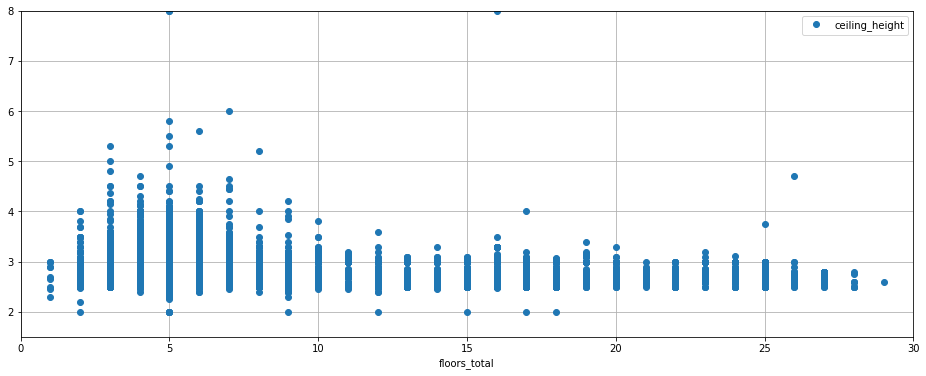

In [27]:
df.plot(x='floors_total', y='ceiling_height', ylim=(1.5, 8), xlim=(0, 30), style='o', grid=True,  figsize=(16, 6))

<div class="alert alert-info">
<strong>Довольно интересная зависимость наибольшая высота потолков наблюдается в домах небольшой этажности. Это логично в отличие от 20 ти этажных "человейников" квартиры в домах малой этажности более дорогие и более комфортные</strong> </div>

In [28]:
df['floors_total'].value_counts().head()


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

<div class="alert alert-info">
    <strong>Количество пустых значений в высоте потолков</strong> </div>

In [29]:
df['ceiling_height'].isna().sum()

9195

<div class="alert alert-info">
    <strong>Попробуем сравнить медианы разных этажей</strong> </div>

In [30]:
median_3 = df.loc[df['floors_total'] == 3, 'ceiling_height'].median()
print('Медиана 3 этаж - ', median_3)
median_4 = df.loc[df['floors_total'] == 4, 'ceiling_height'].median()
print('Медиана 4 этаж - ', median_4)
median_5 = df.loc[df['floors_total'] == 5, 'ceiling_height'].median()
print('Медиана 5 этаж - ', median_5)
median_6 = df.loc[df['floors_total'] == 6, 'ceiling_height'].median()
print('Медиана 6 этаж - ', median_6)
median_15 = df.loc[df['floors_total'] == 15, 'ceiling_height'].median()
print('Медиана 15 этаж - ', median_15)

Медиана 3 этаж -  2.8
Медиана 4 этаж -  3.0
Медиана 5 этаж -  2.55
Медиана 6 этаж -  3.0
Медиана 15 этаж -  2.7


<div class="alert alert-info">
<strong>Медианы разные попробуем вставить медианные значения в зависимости от этажа</strong> </div>

In [31]:
for city in df['locality_name'].unique():
    for floor in df['floors_total'].unique():
        median = df.loc[df['floors_total'] == floor, 'ceiling_height'].median()
        df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == floor) & (df['locality_name'] == city ),'ceiling_height'] = median
        
            


In [32]:
df['ceiling_height'].isna().sum()

112

<div class="alert alert-info">
<strong>Осталось 112 пустых строк в потолках заполним медианой столбца с учетом населенного пункта </strong> </div>

In [33]:
for city in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == city, 'ceiling_height'].median()
        if (df['locality_name'] == city).sum()> 50:
            df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == city), 'ceiling_height'] = median
        else:
            df.loc[(df['ceiling_height'].isna()), 'ceiling_height'] = df['ceiling_height'].median()

In [34]:
df['ceiling_height'].isna().sum()

0

<div class="alert alert-info">
    <strong>Пропущенные значения высоты потолков заполнены </strong> </div>

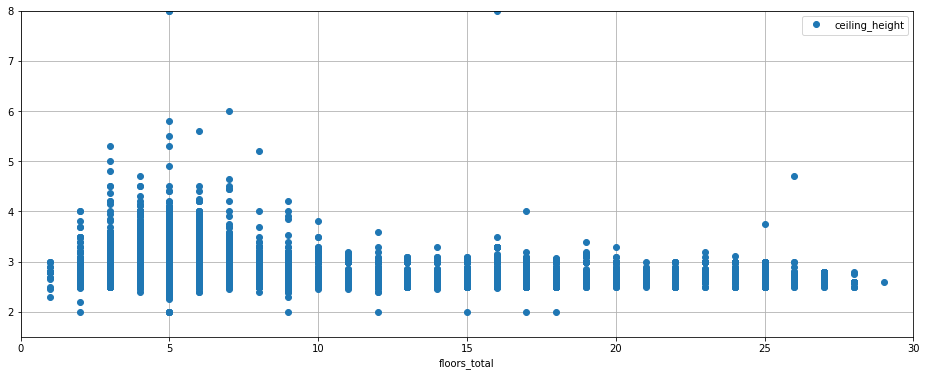

In [35]:
df.plot(x='floors_total', y='ceiling_height', ylim=(1.5, 8), xlim=(0, 30), style='o', grid=True,  figsize=(16, 6))

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Отлично, молодец, что исследовал данные.

</div>

<div class="alert alert-info">
<strong>Проверим так же что жилая площадь зависит от площади квартиры </strong> </div>

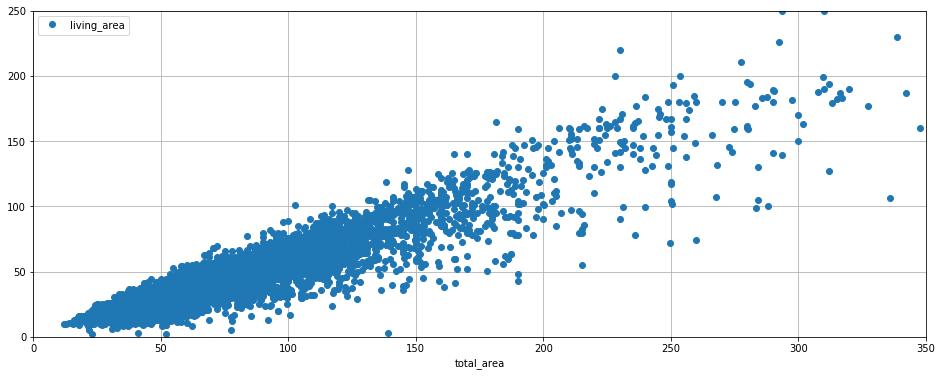

In [36]:
df.plot(x='total_area', y='living_area', ylim=(0, 250), xlim=(0, 350), style='o', grid=True,  figsize=(16, 6))

<div class="alert alert-info">
    <strong>Тут зависимость четко прослеживается</strong> </div>

In [37]:
df['living_area'].isna().sum()

1903

<div class="alert alert-info">
    <strong> Проставим медианы на место пропущенных значений исходя из диапазона площади квартир </strong> </div>

In [38]:
median_50 = df.loc[df['total_area'] <= 50, 'living_area'].median()
print('Медиана жил площ до 50 кв м - ', median_50)

median_50_100 = df.loc[(50 < df['total_area']) & (df['total_area'] <= 100), 'living_area'].median()
print('Медиана жил площ c 50 до 100 кв м - ', median_50_100)

median_100_150 = df.loc[(100 < df['total_area']) & (df['total_area'] <= 150), 'living_area'].median()
print('Медиана жил площ c 100 до 150 кв м - ', median_100_150)

median_150_200 = df.loc[(150 < df['total_area']) & (df['total_area'] <= 200), 'living_area'].median()
print('Медиана жил площ c 150 до 200 кв м - ', median_150_200)

median_200_250 = df.loc[(200 < df['total_area']) & (df['total_area'] <= 250), 'living_area'].median()
print('Медиана жил площ c 200 до 250 кв м - ', median_200_250)

median_250_300 = df.loc[(250 < df['total_area']) & (df['total_area'] <= 300), 'living_area'].median()
print('Медиана жил площ c 250 до 300 кв м - ', median_250_300)

median_300_350 = df.loc[(300 < df['total_area']) & (df['total_area'] <= 350), 'living_area'].median()
print('Медиана жил площ c 300 до 350 кв м - ', median_300_350)

Медиана жил площ до 50 кв м -  18.4
Медиана жил площ c 50 до 100 кв м -  39.6
Медиана жил площ c 100 до 150 кв м -  68.4
Медиана жил площ c 150 до 200 кв м -  99.1
Медиана жил площ c 200 до 250 кв м -  145.0
Медиана жил площ c 250 до 300 кв м -  164.5
Медиана жил площ c 300 до 350 кв м -  187.0


In [39]:
for city in df['total_area']:
        if city <= 50:
            df.loc[df['living_area'].isna(), 'living_area'] = median_50
        if 50 < city <= 100:
            df.loc[df['living_area'].isna(), 'living_area'] = median_50_100
        if 100 < city <= 150:
            df.loc[df['living_area'].isna(), 'living_area'] = median_100_150
        if 150 < city <= 200:
            df.loc[df['living_area'].isna(), 'living_area'] = median_150_200
        if 200 < city <= 250:
            df.loc[df['living_area'].isna(), 'living_area'] = median_200_250
        if 250 < city <= 300:
            df.loc[df['living_area'].isna(), 'living_area'] = median_250_300
        if 300 < city <= 350:
            df.loc[df['living_area'].isna(), 'living_area'] = median_300_350
        
            
        

In [40]:
df['living_area'].isna().sum()

0

<div class="alert alert-info">
    <strong> Пропуски в 'living_area' заполнили</strong> </div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Здорово, что решил ввести категории площади квартир.

</div>

<div class="alert alert-info">
    <strong>Заполним пропуски  'kitchen_area'
    тот же принцип что и в жилой площади заполняем медианами согласно общей площади </strong> </div>

In [41]:
df['kitchen_area'].isna().sum()

2278

In [42]:
median_k_50 = df.loc[df['total_area'] <= 50, 'kitchen_area'].median()

median_k_50_100 = df.loc[(50 < df['total_area']) & (df['total_area'] <= 100), 'kitchen_area'].median()

median_k_100_150 = df.loc[(100 < df['total_area']) & (df['total_area'] <= 150), 'kitchen_area'].median()

median_k_150_200 = df.loc[(150 < df['total_area']) & (df['total_area'] <= 200), 'kitchen_area'].median()

median_k_200_250 = df.loc[(200 < df['total_area']) & (df['total_area'] <= 250), 'kitchen_area'].median()

median_k_250_300 = df.loc[(250 < df['total_area']) & (df['total_area'] <= 300), 'kitchen_area'].median()

median_k_300_350 = df.loc[(300 < df['total_area']) & (df['total_area'] <= 350), 'kitchen_area'].median()


In [43]:
for city in df['total_area']:
        if city <= 50:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_50
        if 50 < city <= 100:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_50_100
        if 100 < city <= 150:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_100_150
        if 150 < city <= 200:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_150_200
        if 200 < city <= 250:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_200_250
        if 250 < city <= 300:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_250_300
        if 300 < city <= 350:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_300_350
        

In [44]:
df['kitchen_area'].isna().sum()

0

<div class="alert alert-info">
    <strong>Попробуем заполнить пропуски 'kitchen_area' альтернативным методом, попробуем найти койфециент соотношения общей площади к площади кухни и заполним пропуски с умножая общую площадь на этот коэффициент</strong> </div>

In [45]:
df['kitchen_area'].isna().sum()

0

In [46]:
median_aver_kitch = (df['kitchen_area']/df['total_area']).median()
print(median_aver_kitch)


0.1801801801801802


In [47]:
#df.loc[(df['kitchen_area'].isna()), 'kitchen_area'] = median_aver_kitch * df.loc[(df['kitchen_area'].isna()), 'total_area']

<div class="alert alert-info">
    <strong>Тоже работает</strong> </div>

In [48]:
df['kitchen_area'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Отлично.

</div>

<div class="alert alert-info">
    <strong>Заполним пропуски 'floors_total' учитывая местоположение квартиры
Перебираем Питер и поселки. Там где обьявлений больше 50 заменяем пропуски на медиану по поселку, там где меньше на общую медиану. Цифры 50 взята как менее 5% от общего количества¶</strong> </div>

In [49]:
df['floors_total'].isna().sum()

86

In [50]:
for city in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == city, 'floors_total'].median()
        if (df['locality_name'] == city).sum()> 50:
            df.loc[(df['floors_total' ].isna()) & (df['locality_name'] == city), 'floors_total' ] = median 
        else:
            df.loc[(df['floors_total' ].isna()), 'floors_total' ] = df['ceiling_height'].median()

In [51]:
df['floors_total'].isna().sum()

0

<div class="alert alert-info">
    <strong>Заполним пропуски 'days_exposition' учитывая местоположение квартиры Перебираем Питер и поселки. Там где обьявлений больше 50 заменяем пропуски на медиану по поселку, там где меньше на общую медиану. Цифры 50 взята как менее 5% от общего количества¶</strong> </div>

In [52]:
print(df['days_exposition'].median())
print(df.loc[(df['locality_name'] == 'санкт-петербург'), 'days_exposition'].median())  	
print(df.loc[(df['locality_name'] == 'посёлок шушары'), 'days_exposition'].median())

95.0
95.0
92.0


In [53]:
df['days_exposition'].isna().sum()

3181

In [54]:
for city in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == city, 'days_exposition'].median()
        if (df['locality_name'] == city).sum()> 50:
            df.loc[(df['days_exposition'].isna()) & (df['locality_name'] == city), 'days_exposition'] = median 
        else:
            df.loc[(df['days_exposition'].isna()), 'days_exposition'] = df['days_exposition'].median()

In [55]:
df['days_exposition'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Отлично. 

</div>

Проверим значение в столбце is_apartment - апартаменты (булев тип)
мы  видим три значение , очевидно что их должно быть два либо False либо True  
меняем nan на False

In [56]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [57]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([False,  True])

In [58]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

С такой заменой согласна, скорее всего если данные не указали, то эти квартиры не являются апартаментами.

</div>

### NaN в столбце балконов balcony это его отсутствие в квартире, меняем значение на ноль

In [59]:
df['balcony'] = df['balcony'].fillna(0)
display(df['balcony'].isnull().sum())

0

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично.

</div>

### NaN в столбце parks_around3000 — число парков в радиусе 3 км  ponds_around3000 — число водоёмов в радиусе 3 км это их отсутствие меняем значение на ноль¶

In [60]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

### Квартиры без местоположения locality_name == NaN можно убрать их меннее 0.2% от общего количества

In [61]:
print(49/(23699/100),'% от общего количества квартир без обозначения местоположения')

0.2067597788936242 % от общего количества квартир без обозначения местоположения


In [62]:
 df = df[~df['locality_name'].isna()] #Попробуй не удалять их, а отфильтровать те строки, в которых нет пропусков в новый фрейм.
#Например, вот так: df2 = df[~df['a'].isna()]  ~ это логическое отрицание
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

###  Итак у нас остались пропуски

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
согласно превью данные были внесены автоматическитакое большое количество пропусков связано с неточной настройкой алгоритма, скорее всего дальше определенного расстояния алгоритм считал что рядом ничего нет и проставлял пропуск, **будем считать что пропуск это очень далеко**


### Проверим эту мысль
мы видим что алгорим вносит данные достаточно ровно без выбросов, mean практически равно median, поэтому предположение верно
### Оставим пропуски как показатели удаленности от данных обьектов

In [63]:
df['ponds_nearest'].describe()

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [64]:
display(df.isnull().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

In [65]:
df['airports_nearest'].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [66]:
df['cityCenters_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [67]:
df['parks_around3000'].describe()

count    23650.000000
mean         0.469091
std          0.748458
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [68]:
df['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо, такие пропуски лучше оставить, т.к. правдоподнобно их сложно заполнить. А если удалять, тогда мы потеряем много данных.

</div>

### Смотрим типы данных в базе

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000

In [70]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


###  Видим что дата имеет значение - first_day_exposition    23650 non-null - object, меняем ее на тип даты так лучше с этитми данными работать в дальнейшем

In [71]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [72]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           8064 non-null float64
ponds_ar

### Шаг 3. Посчитайте и добавьте в таблицу

 Добавляем цену кв. метра

In [74]:
df['price_square_meter'] = (df['last_price']/df['total_area']).astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


### день недели, месяц и год публикации объявления;

<div class="alert alert-info">
    <strong>добавляем номер дня, месяц и год публикации</strong> </div>

In [75]:
df['day_week_pub'] = df['first_day_exposition'].dt.weekday
df['day_month_pub'] = df['first_day_exposition'].dt.month
df['day_year_pub'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Ты забыл добавить месяц и год публикации.</s>

</div>

<div class="alert alert-info">
    <strong>Сделано</strong> </div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо.

</div>

**добавляем сам день**

In [76]:
#df['day_week_month_year_pub'] = df['first_day_exposition'].dt.weekday_name
#df.head()

### этаж квартиры; варианты — первый, последний, другой;

In [77]:
def floor_flat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return'последний'
    else:
        return 'другой'
df['floor_flat'] = df.apply(floor_flat, axis = 1)# Т.к. нужен доступ к двум столбцам сразу, 
# то функцию нужно применять не к столбцу, а к строке:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой


### соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [78]:
df['ratio_living_total_area']=df['living_area']/df['total_area']
df['ratio_kitchent_total_area']=df['kitchen_area']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.430189,0.098113
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.  Построим гистограммы

Text(0, 0.5, 'Количество в продаже')

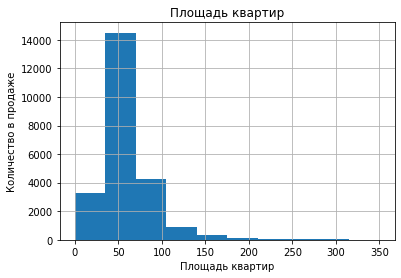

In [79]:
df['total_area'].hist(bins=10, range = (0, 350))
plt.title('Площадь квартир')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество в продаже')

In [80]:

df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

### Вычислим усы

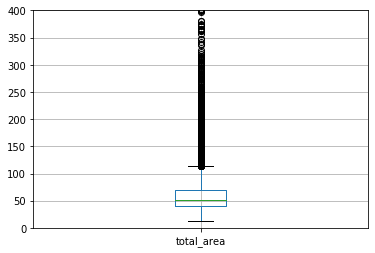

In [81]:
df.boxplot('total_area')
plt.ylim(0, 400)
plt.show()

In [82]:
q1 = df['total_area'].quantile(0.05)
q3 = df['total_area'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

Нижний ус =  -96.5
Верхний ус =  243.5


<div class="alert alert-info">
    <strong>Слишком много удаляем увеличим межквартильный размах</strong> </div>

### Построим violin plot

<div class="alert alert-danger" role="alert">
<h2>Не посторилась диаграмма  violin plot почему?.</h2>
</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

`y` был задан не верно. Смотри график ниже.

</div>

<div class="alert alert-info">
    <strong>Спасибо :))</strong> </div>

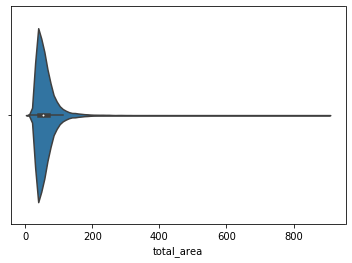

In [83]:
sns.violinplot(x='total_area', data=df);
#plt.ylim(0, 350)
#plt.show()

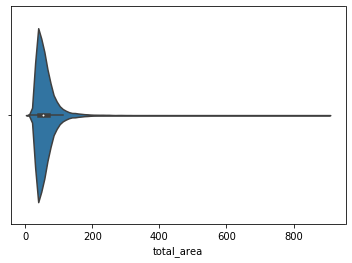

In [84]:
sns.violinplot(x=df['total_area'])

**смотрим какой процент занимают выбросы**

In [85]:
display(((df['total_area'] > 244).sum())/(df['total_area'].count().sum()))

0.005285412262156448

In [86]:
display((df['total_area'] > 244).sum())

125

In [87]:
display(df['total_area'].count())

23650

**удаляем их**

In [88]:
df = df[df['total_area'] < 244]
display((df['total_area'] > 244).sum())

0

In [89]:
display(df['total_area'].count())

23524

<div class="alert alert-info">
<strong>Диаграмма после удаления усов  Плащадь квартир </strong> </div>

Text(0, 0.5, 'Количество в продаже')

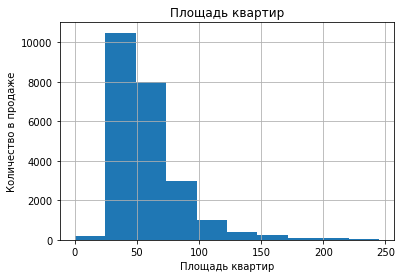

In [90]:
df['total_area'].hist(bins=10, range = (0, 245))
plt.title('Площадь квартир')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество в продаже')

Text(0, 0.5, 'Количество в продаже')

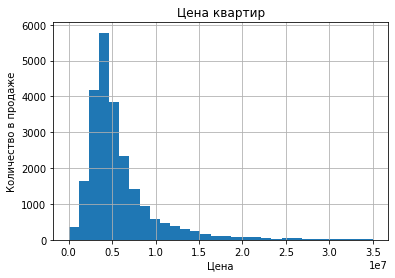

In [91]:
#df['last_price'].astype(int)
df['last_price'].hist(bins=30, range = (0, 35000000))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество в продаже')


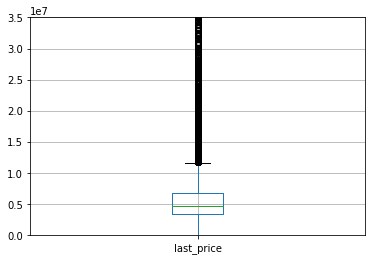

In [92]:
df.boxplot('last_price')
plt.ylim(0, 35000000)
plt.show()


<div class="alert alert-danger">
<h2> Комментарий от ревьюера v2</h2>

В конце проекта я обозначила пункты, которые нужно доработать. Возможно ты не заметил, в следующий раз постараюсь более заметно отображать. Прошу тебя применить автоматизацию графиков для вывода подобных графиков. Т.е. сделать это с помощью цикла. Можешь выполнить это где тебе удобно.

</div>

<a id="cell1"></a>
<div class="alert alert-info">
    <strong>Сорри, не было в прошлый раз выделенно краcным поэтому не принял к исполнению :))</strong> </div>

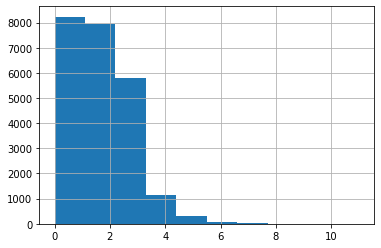

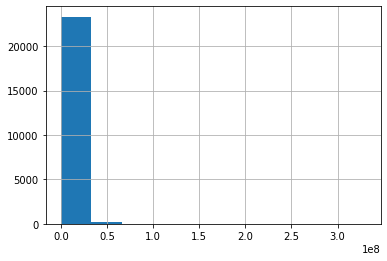

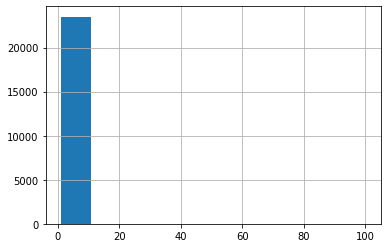

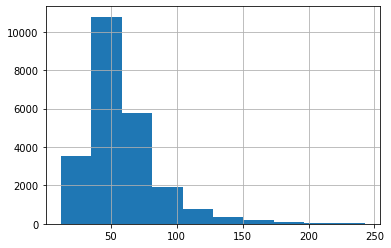

In [115]:
df_for_diagr = ['rooms', 'last_price','ceiling_height','total_area']
for diagram in df_for_diagr:
    df[diagram].hist()
    plt.show()


In [112]:
display(df_for_diagr)

,rooms,last_price,ceiling_height,total_area
0,3,13000000.0,2.70,108.00
1,1,3350000.0,2.75,40.40
2,2,5196000.0,2.55,56.00
3,3,64900000.0,2.60,159.00
4,2,10000000.0,3.03,100.00
...,...,...,...,...
23694,3,9700000.0,3.70,133.81
23695,3,3100000.0,2.55,59.00
23696,2,2500000.0,2.80,56.70
23697,2,11475000.0,3.00,76.75


In [ ]:
q1 = df['last_price'].quantile(0.05)
q3 = df['last_price'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)
print('Максимальное значение - ', df['last_price'].max())

<div class="alert alert-info">
    <strong>Слишком большой процент на удаление , увеличим межквартильный размах</strong> </div>

In [ ]:
df['last_price']=df['last_price'].astype(int)
display((df['last_price'] == 0).sum())# проверим есть ли квартиры с 0 стоимостью
display((df['last_price']).min())


**цена очень маленькая для такой квартиры уберем ее очевидно это ошибка внесения данных**

In [ ]:
df = df[df['last_price'] > 12190]

In [ ]:

df['last_price'].describe()

In [ ]:
df['last_price'].max()

**смотрим какой процент занимают выбросы**

In [ ]:
display(((df['last_price'] > 33975000).sum())/(df['last_price'].count().sum()))

In [ ]:
df['last_price'].count()

In [ ]:
df = df[df['last_price'] < 33975000]
display((df['last_price'] > 33975000).sum())

In [ ]:
df['last_price'].count()

<div class="alert alert-info">
    <strong>Диграмма после удаления усов цена квартиры</strong> </div>

In [ ]:
df['last_price'].hist(bins=30, range = (0, 21503750))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество в продаже')


In [ ]:
df['rooms'].hist(bins=10, range = (0, 10))
plt.title('Кол_во комнат')
plt.xlabel('Кол_во комнат')
plt.ylabel('Количество в продаже')

In [ ]:
df.boxplot('rooms')
plt.ylim(0, 8)
plt.show()


In [ ]:
df['rooms'].value_counts()

In [ ]:
df['rooms'].describe()

### Выявили квартиры с нулевым количеством комнат скорее всего ошибка внесения заменим на медиану

In [ ]:
df.query('rooms == 0')

### посчитаем количество нулей в df['rooms']

In [ ]:
#df['rooms'].value_counts()
df['rooms'].unique()

In [ ]:
print((df['rooms'] == 0).sum())
print((df['rooms'] == 1).sum())
print((df['rooms']).count().sum())

In [ ]:
count = 0
for zero in df['rooms']:
    if zero == 0:
        count+=1
print(count)        
    

<div class="alert alert-info">
    <strong>Скорее всего комнаты с нулевым количеством комнат это студии , но судя по их небольшому количеству скорее всего часть студий вносится как однокомнатные квартиры, те нет четкого правила как вносить студии, этот момент необходимо обговорить с теми кто вносит квартиры и сделать стандарт внесения в форме на сайте. Заменим нули на еденицы, в любом случае этих квартир немного даже если я ошибся сильного влияния это не окажет</strong> </div>

In [ ]:
#df['rooms'].astype(int)
#df['rooms'] = df['rooms'].isnull(df['rooms'].median())
df.loc[df['rooms'] == 0, 'rooms'] = 1
display((df['rooms'] == 0).sum())

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Стоит изучить данные с нулевыми комнатами перед такой координальной заменой. </s>
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Да, чаще всего так вносят студии. Согласна, что нет единого правила, и каждый обозначает студии как хочет.

</div>

**смотрим диааграмму после изменения**

In [ ]:
df['rooms'].hist(bins=10, range = (0, 10))
plt.title('Кол-во комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Количество в продаже')

In [ ]:
df.boxplot('rooms')
plt.ylim(0, 9)
plt.show()


In [ ]:
q1 = df['rooms'].quantile(0.25)
q3 = df['rooms'].quantile(0.75)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

**смотрим какой процент занимают выбросы**

In [ ]:
print((df['rooms'] > 6).sum())

In [ ]:
print(df['rooms'].value_counts())

In [ ]:
display(((df['rooms'] > 6).sum())/(df['rooms'].count().sum()))

In [ ]:
df['ceiling_height'].hist(bins=20, range = (2.5, 4.5))
plt.title('Высота потолка')
plt.xlabel('Высота потолка м')
plt.ylabel('Количество в продаже')

### Попробуем построить диаграмму размаха

In [ ]:
df.boxplot('ceiling_height')
plt.ylim(0, 4)
plt.show()


In [ ]:
q1 = df['ceiling_height'].quantile(0.05)
q3 = df['ceiling_height'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

<div class="alert alert-info">
    <strong>при значении quantile 25 и 75 % удаляется более 10% значений это много снизим квантили до 5 и 95 %</strong> </div>

**смотрим какой процент занимают выбросы**

In [ ]:
print((df['ceiling_height'] > 1.75).sum())
print(df['ceiling_height'].count().sum())

In [ ]:
display(((df['ceiling_height'] < 1.75).sum())/(df['ceiling_height'].count().sum()))

In [ ]:
display(((df['ceiling_height'] > 3.75).sum())/(df['ceiling_height'].count().sum()))

<div class="alert alert-info">
    <strong>смотрим кличество значений</strong> </div>

In [ ]:
df['ceiling_height'].count()

**Удаляем значения ниже нижнего уса и выше вехнего уса**

In [ ]:
df = df[df['ceiling_height'] > 1.75]
display((df['ceiling_height'] > 1.75).sum())
df = df[df['ceiling_height'] < 3.75]
display((df['ceiling_height'] < 3.75).sum())

<div class="alert alert-info">
<strong>смотрим кличество значений</strong> </div>

In [ ]:
df['ceiling_height'].count()

<div class="alert alert-info">
<strong>Диаграмма после удаления усов высота потолка</strong> </div>

In [ ]:
df['ceiling_height'].hist(bins=20, range = (2.5, 3.6))
plt.title('Высота потолка')
plt.xlabel('Высота потолка м')
plt.ylabel('Количество в продаже')

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Пожалуйста, дополни пункт выводами, что ты интересного увидел при исследовании распределений значений. Опиши типичные квартиры.
    
Так же еще хочу обратить твоё внимание на удаление выбросов. После завершения удаления нужно проверить, сколько всего данных было удалено, не потеряли ли мы много данных.</s>

</div>

<div class="alert alert-info">
    <strong>Несмотря на звание "второй столицы" наибольшее количество продаваемых квартир, бюджетного класса 1-2 комнатные с низкими потолками, площадью до 50 кв метров скорее всего это новостройки. Было бы интресно посмотреть на количество в продаже квартир студий но к сожалению из нестандартизированного вноса данных это сделать сложно </strong> </div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо. Да, с внесением данных есть проблемы.
    
Молодец, что корректируешь границы выбросов, где это необходимо.

</div>

### Изучим время продажи квартиры. Построим гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [ ]:
df['days_exposition'].hist(bins=60, range = (1, 1400), figsize=(15, 5))
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество проданных')

In [ ]:
df.boxplot('days_exposition')
plt.ylim(0, 1600)
plt.show()

In [ ]:
df['days_exposition'].describe()

### Вычислим усы межквартильного размаха чтобы убрать выбросы

In [ ]:
q1 = df['days_exposition'].quantile(0.05)
q3 = df['days_exposition'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

<div class="alert alert-info">
    <strong>при значении quantile 25 и 75 % удаляется более 7% значений это много снизим квантили до 5 и 95 %</strong> </div>

### Выясним сколько у нас значений выше верхнего уса

In [ ]:
display(len(df[df['days_exposition'] > 1482]))

In [ ]:
display((df['days_exposition'] > 1482).sum())

In [ ]:
df['days_exposition'].describe()

**Процент от общего количества**

In [ ]:
display(df['days_exposition'].count())

In [ ]:
df.groupby(df['days_exposition'] < 1482)['days_exposition'].describe()

In [ ]:
df['days_exposition'].count()

**Уберем выбросы все что  выше 1482**

In [ ]:
df = df[df['days_exposition'] < 1482]


In [ ]:
df['days_exposition'].count()

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Молодец, что ты смотришь графики боскплот и определяешь границы усов при определении выбросов. Но всё же иногда усы ограничивают большой процент данных, как в этой ситуации, 10 % для удаления данных это не мало. В таких ситуациях нужно расширять границы усов, используя метод `quantile()`, задавая процент данных, который хочешь оставить. Например, `quantile(0.95)` или `quantile(0.99)`.

</div>

In [ ]:
df['days_exposition'].hist(bins=80, range = (1, 400), figsize=(15, 5))
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество в продаже')

In [ ]:
df['days_exposition'].describe()

[**Выброс на 95 днях, это замененные на пропуски на медиану**](#cell1)

In [ ]:
display((df['days_exposition'] == 95).sum())

In [ ]:
df['days_exposition'].value_counts()

### Обычно продажа занимает примерно 90 дней. 
### Cамыe быстрые продажи  продажи короче 5% перцентиля. 
### Самые медленные длиннее 95%
**На практике границами выбросов снизу и сверху обычно берут 5й и 95й (или 1й и 99й) перцентили.**

In [ ]:
print('Самые быстрые продажи до ', df['days_exposition'].quantile(0.05), 'дней')

In [ ]:
print('Самые медленные продажи больше ', df['days_exposition'].quantile(0.95), 'дней')

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично. Так же пароцентили тоже можно использовать для ограничения выбросов.

</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера v2</h2>

Я вижу, что ты оценивал процент удаляемых строк, молодец. Но так же не забывай оценивать общие потери. Иногда вроде из каждого столбца понемногу убрали выбросов, а в сумме можем удалить внушительный процент из датасета.

</div>

### Какие факторы больше всего влияют на стоимость квартиры

In [ ]:
df.head()

#### Сделаем сводную таблицу цена от площади, числа комнат, удалённости от центра

**прикинем корреляцию между данными**

In [ ]:
print(df['total_area'].corr(df['last_price']))
print(df['last_price'].corr(df['total_area'])) # поменяли местами
print()
print(df['price_square_meter'].corr(df['total_area']))


Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю, значит связь слабая, либо отсутствует вовсе  


**здесь у нас корреляция есть но не очень большая** 

In [ ]:
df.plot(x='last_price', y='total_area', ylim=(0, 300), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к площади квартиры')
df.plot(x='price_square_meter', y='total_area', ylim=(0, 300), xlim=(0, 330000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена  кв м к площади')
#display(df.head())

In [ ]:
print(df['cityCenters_nearest'].corr(df['last_price']))
print(df['last_price'].corr(df['cityCenters_nearest'])) # поменяли местами 

In [ ]:
display(df['last_price'].corr(df['cityCenters_nearest']))
display(df['price_square_meter'].corr(df['cityCenters_nearest']))
df.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 70000), xlim=(0, 33000000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена к удаленности от центра квартиры без сортировки')
df.plot(x='price_square_meter', y='cityCenters_nearest', ylim=(0, 70000), xlim=(0, 330000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена кв м к удаленности от центра квартиры без сортировки')

In [ ]:
display(df['last_price'].corr(df['rooms']))
display(df['price_square_meter'].corr(df['rooms']))
df.plot(x='last_price', y='rooms', ylim=(0, 7), xlim=(0, 11000000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена к числу комнат без сортировки')
df.plot(x='price_square_meter', y='rooms', ylim=(0, 7), xlim=(0, 230000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена кв м числу комнат без сортировки')

**выше взяли общие данные из таблицы без учета места расположения квартиры, количества комнат и этажа**

**прикинем где и сколько квартир в продаже в Питере и Мурино чтобы посмотреть корреляцию по наиболее распостранненым**

In [ ]:
df['locality_name'].value_counts().head(5)

**Рассмотрим применительно к Спб как соотносится цена от площади, числа комнат, удалённости от центра**

In [ ]:
df['total_area'] = df['total_area'].astype(int)
#df_spb = df[df['locality_name'] == 'санкт-петербург']
df_spb = df.query('locality_name == "санкт-петербург"')

'''Проверим будет ли зависимость если мы оставим только однокомнатные квартиры например'''

df_spb_rooms1 = df.query('locality_name == "санкт-петербург" and rooms==2')

'''Проверим будет ли зависимость если мы ограничим разброс по площади например'''

df_spb_area = df.query('locality_name == "санкт-петербург" and 45 < total_area < 55')

display('Цена', df_spb['last_price'].describe())
display('Площадь квартир',df_spb['total_area'].describe())
display('Число комнат',df_spb['rooms'].describe())
display('Удаленость от центра',df_spb['cityCenters_nearest'].describe())
df_spb.plot(x='last_price', y='total_area', ylim=(0, 300), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к площади')
df_spb.plot(x='last_price', y='rooms', ylim=(0, 7), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к числу комнат')
df_spb.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра квартиры без сортировки')
df_spb_rooms1.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра двушки')
df_spb_area.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра площадь квартир от 45 да 55')

### Рассмотрим Мурино цена от площади, числа комнат, удалённости от центра

In [ ]:
df_mur = df.query('locality_name == "посёлок мурино"')
display('Цена', df_mur['last_price'].describe())
display('Площадь квартир',df_mur['total_area'].describe())
display('Число комнат',df_mur['rooms'].describe())
display('Удаленость от центра',df_mur['cityCenters_nearest'].describe())
df_mur.plot(x='last_price', y='total_area', ylim=(0, 120), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к площади')
df_mur.plot(x='last_price', y='rooms', ylim=(0, 7), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к числу комнат')
df_mur.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра')

### Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

**из - за того что у нас в этажах строковые значения диаграмму не построить встроим столбец с цифрами**

In [ ]:
def floor(row):
    if row == 'первый':
        return 1
    if row == 'последний':
        return 3
    if row == 'другой':
        return 2
df['floor_flat_int'] = df['floor_flat'].apply(floor)
df.head()

In [ ]:
df.plot(x='last_price', y='floor_flat_int', ylim=(0, 4), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к этажу квартиры без сортировки')

### Попробуем учесть местоположение Спб, удаленность, количество комнат и площадь 

In [ ]:
df_floor_flat = df.query('locality_name == "санкт-петербург" and rooms==2 and 45 < total_area < 55 and 12000 < cityCenters_nearest < 14000')

In [ ]:
df_floor_flat.plot(x='last_price', y='floor_flat_int', ylim=(0, 4), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к этажу квартиры c сортировкой')

 ### Изучим зависимость цены от даты размещения: дня недели, месяца и года.
 ### Необходимо выделить из формата даты год и месяц

**Добавляем ячейку с годом и строи диаграмму**

In [ ]:
df['first_yars_exposition'] = df['first_day_exposition'].dt.year


In [ ]:
df.plot(x='last_price', y='first_yars_exposition', ylim=(2013, 2020), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Зависимость цены от года размещения')

**Добавляем ячейку с месяцем и строим диаграмму**

In [ ]:
df['first_month_exposition'] = df['first_day_exposition'].dt.month

In [ ]:
df.plot(x='last_price', y='first_month_exposition', ylim=(0, 13), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Зависимость цены от месяца размещения')

### Cтроим диаграмму по дням недели
### Понедельник — день под номером 0, а воскресенье — шестой день

In [ ]:
df.head()

In [ ]:
df.plot(x='last_price', y='day_week_pub', ylim=(-1, 7), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Зависимость цены от дня недели размещения')

### Вывод

### На диаграмме  цена от площади мы видим что общая цена зависит от площади квартиры, но практически  цены за квадратный метр не зависит от площади, там роль играют другие факторы. Количество комнат и  удалённость от центра так же сильной зависимости не показывают.
### Есть небольшая зависимость цены от года размещения, по все видимости долго продающиеся квартиры продаются с дисконтом к рынку.
### Есть  зависимость цены от этажа первые и последние этажи,  продаются дешевле.
### День и месяц размещения практически влияния на цену не оказывает


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Молодец, что рассчитываешь коэффициенты корреляции и подкрепляешь рассчеты диаграммой рассеяния.

</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Всё же удаленность от центра и количество комнат влияют на цену, коэффициент около 0,3 не такой низкий.

</div>

___________

### Выберем 10 населённых пунктов с наибольшим числом объявлений. 

In [ ]:
good_data = (df.query('locality_name != "санкт-петербург"')
.groupby(by='locality_name').agg({'first_day_exposition': 'count', 'price_square_meter':'median'})
.sort_values(by = 'first_day_exposition', ascending=False).head(10))
display(good_data)
labels = ['посёлок мурино', 'посёлок шушары', 'всеволожск', 'посёлок парголово', 'колпино', 'пушкин', 'деревня кудрово', 'гатчина', 'выборг', 'кудрово']

plt.pie(good_data['price_square_meter'], labels=labels, autopct='%1.1f%%', shadow=True, rotatelabels=True, radius=2)
plt.show()

**Спб тоже населенный пункт**

In [ ]:
df['locality_name'].value_counts().head(10)

### Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [ ]:
print('Средняя цена в санкт-петербург-', df.query('locality_name == "санкт-петербург"')['price_square_meter'].median())
print('Средняя цена в посёлок мурино -', df.query('locality_name == "посёлок мурино"')['price_square_meter'].median())
print('Средняя цена в посёлок шушары -', df.query('locality_name == "посёлок шушары"')['price_square_meter'].median())
print('Средняя цена в всеволожск -    ', df.query('locality_name == "всеволожск"')['price_square_meter'].median())
print('Средняя цена в посёлок парголово-', df.query('locality_name == "посёлок парголово"')['price_square_meter'].median())
print('Средняя цена в колпино -       ', df.query('locality_name == "колпино"')['price_square_meter'].median())
print('Средняя цена в пушкин-         ', df.query('locality_name == "пушкин"')['price_square_meter'].median())
print('Средняя цена в деревня кудрово-', df.query('locality_name == "деревня кудрово"')['price_square_meter'].median())
print('Средняя цена в гатчина-        ', df.query('locality_name == "гатчина"')['price_square_meter'].median())
print('Средняя цена в выборг -        ', df.query('locality_name == "выборг"')['price_square_meter'].median())

In [95]:
median_price_city = df.groupby(by='locality_name').agg({'price_square_meter': 'median'}).sort_values(by = 'price_square_meter', ascending=False).head(10)
display(median_price_city)

,price_square_meter
locality_name,
посёлок лисий нос,121615.5
санкт-петербург,104687.0
зеленогорск,101666.5
пушкин,100000.0
кудрово,100000.0
сестрорецк,99678.0
посёлок левашово,96997.0
деревня кудрово,91860.0
посёлок парголово,91642.0


### Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

Средняя цена в санкт-петербург- 104 256.0 
Средняя цена в городе Выборг -   58 133.0

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Данные получены верно, хорошо.

</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

* Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм.
    
* Так же перед диаграммой у тебя много не нужно информации, поэтому в конце кода нужно добваить `plt.show()`.
    
* Вывод в ячейке кода 114, где средняя цена за кв.м., можно выполнить с помощью сводной таблицы по населенным пунктам, получится компактный код и удобный вывод.

</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо.

</div>

###  Какие квартиры в Спб входят в центр.

In [ ]:
display(df.head())

**Добавляем столбец с расстоянием от центра в километрах и окгугляем его .round(0) или делением нацело**

In [ ]:
df['cityCenters_km_nearest'] = (df['cityCenters_nearest']/1000).round(0)
#df['cityCenters_km_nearest'] = df['cityCenters_nearest']//1000
df_spb_km = df.query('locality_name == "санкт-петербург"')
df_spb_km.head()

### Посчитаем среднюю цену для каждого километра и количество обьявлений на каждом километре  
### выведем два графика , цена за метр и цена за квартиру

In [ ]:
""" Делаем сводную таблицу из расстояния до центра и цен за метр и за квартиру"""

df_spb_price__km = (df_spb_km.groupby('cityCenters_km_nearest').agg({'price_square_meter':'median', 'last_price':'median', 'cityCenters_km_nearest':'count'})
                    .rename(columns = {'cityCenters_km_nearest':'Кол_во_обьявлений_км','price_square_meter':'Медианная цена за метр', 'last_price':'Медианная цена за квартиру' }))
#display(df_spb_price__km.head())

"""Убираем позиции менее чем с 50 обьявлениями"""

df_spb_price__km = df_spb_price__km.query('Кол_во_обьявлений_км > 50')
display(df_spb_price__km.head(25))

"""Формируем переменную с доп графиком цена за метр"""

price_m = df_spb_price__km['Медианная цена за метр'].plot(grid=True, figsize=(16, 6))

"""Основной график куда вставляем дополнительный"""

df_spb_price__km['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6), ax = price_m.twinx(), color='lightgreen')

"""Линия отсечки максимальной цены"""

plt.axvline(x=5, color='red', linestyle=':')

"""Сетка графика"""
plt.xticks(df_spb_price__km.index.values, df_spb_price__km.index.values)

plt.title('Зависимость цены от удаления от  центра')


### Выделим сегмент квартир в центре. 

In [ ]:
df_spb_center = df_spb_km.query('cityCenters_km_nearest < 5')
display(df_spb_center.head())
display(df_spb_center.info())


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо, определение центра вполне корректно. Но почему на графике 6 км, а ты ограничил значением в 5 км?

</div>

 <div class="alert alert-info">
    <strong>поправил</strong> </div>

**Анализируем квартиры в центре следующие параметры: площадь, цена, число комнат, высота потолков.**
**Выделим эти категории в отдельную таблицу и построим: матрицу диаграмм рассеяния**
**и посмотрим корреляцию**


In [ ]:
df_spb_center_rooms = df_spb_center.loc[:,['rooms', 'last_price','ceiling_height','total_area']]
#display(df_spb_center_rooms.head())
print(df_spb_center_rooms.corr())
pd.plotting.scatter_matrix(df_spb_center_rooms, figsize=(11, 11))
plt.show()

### Факторы, которые влияют на стоимость квартиры в центре (число комнат, этаж, удалённость от центра, дата размещения объявления, площадь квартиры ). В сравнении с общим количеством квартир

In [ ]:
df_spb_center_last_price = df_spb_center.loc[:,['last_price','rooms', 'floor','cityCenters_km_nearest', 'first_day_exposition','total_area', 'ceiling_height']]
print('1. Диаграмма центра')
print('Корреляция')
print('Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю,  значит связь слабая, либо отсутствует вовсе здесь у нас корреляция есть, но не очень большая')
df_last_price = df.loc[:,['last_price','rooms', 'floor','cityCenters_km_nearest', 'first_day_exposition', 'total_area', 'ceiling_height']]      
display(df_spb_center_last_price.corr())
print('2. Диаграмма всего списка')        
print('Корреляция')
display(df_last_price.corr())        

In [ ]:
print('1. Диаграмма центра')
pd.plotting.scatter_matrix(df_spb_center_last_price, figsize=(10, 10))
plt.show()

In [ ]:
print('2. Диаграмма всего списка')
pd.plotting.scatter_matrix(df_last_price, figsize=(10, 10));
plt.show()

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Ты провел исследование, но не сдалал никаких выводов. Дополни это пункт, пожалуйста. Что от чего зависит и какие квартиры типичны для центра.</s>

</div>

<div class="alert alert-info">
    <strong>Сделайте выводы. Отличаются ли они от общих выводов по всему городу?</strong> </div>

**- Медианная стоимость квартир в Санкт Петербурге выше чем в области, видно что чем дальше от центра Петербурга тем ниже стоимость квартир**  
**- Для центра Спб характерна более высокие потолки чем на окраинах**  
**- Для центра Спб характерна большая высота потолков при меньшей этажности**  
**- В центре предложение квартир с кличеством комнат больше 4 минимально**  
**- И в центре и на окраинах чем выше этаж тем меньше цена**  
**- На окраинах больше предложений с высотой потолко с 2.5 да 3.0 м - меньшей чем в центре**  



<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо. Спасибо за дополнения.

</div>

### Шаг 5. Общий вывод

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Задачей проекта является установить параметры, от которых зависить цена квартир. Поэтому прошу тебя дополнить выводы, тем, какие квартиры являются типичными для Санкт-Петербурга, чем отличаются квартиры в центре. От чего завсят цены квартиры, от чего в большей или меньшей степени.</s>
    

</div>

<div class="alert alert-info">
    <strong>Шаг 5. Общий вывод
</strong> </div>


**- Типичная квартира для Спб 2-3 комнатная с высотой потолкав 2.5-3 метра расположенная в 11 и до 17 км  от центра что скорее всего связано с активным стоительством на окраинах города**  
**- Центр:**  
- Медианная стоимость квартир в Санкт Петербурге выше чем в области, видно что чем дальше от центра Петербурга тем ниже стоимость квартир
- Для центра Спб характерна более высокие потолки чем на окраинах
- Для центра Спб характерна большая высота потолков при меньшей этажности
- В центре предложение квартир с кличеством комнат больше 4 минимально
- И в центре и на окраинах чем выше этаж тем меньше цена
- На окраинах больше предложений с высотой потолков с 2.5 да 3.0 м - меньшей чем в центре  
  
**- Общие тенденции оказывающие влияние на цену:**  
  
- Наибольшую зависимость на цену оказывает площадь квартиры
- Так же большое влияние на цену оказывает удаление от центра Спб, чем дальше от центра Петербурга тем ниже стоимость квартир
- Как правило чем больше количество комнат тем выше цена, но тут скорее влияет общея площадь ( у квартир с большим количеством комнат она выше)
- Стоимость квартир на первом и последнем этаже ниже чем на прочих
- Чем выше потолки в квартире тем выше цена


<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Получился очень хороший полный вывод. Молодец, что описал и типичные квартиры, и значимые отличия центра от всего города.

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

---

Ты постарался учесть необходимые шаги проекта, молодец.

Ты очень внимательно относишься к данным, это мне нравится. Стараешься обработать пропуски и выявить зависимости. Ты применяешь подходяещие типы графиков. Если нужно установить зависимость между данными, ты с этим без проблем справляешься.

Осталось немного доработать проект:
1. Скорректируй обработку пропусков.
2. Добавь в данные дополнительные столбцы месяца и года публикации.
3. Изучи данные с нулевыми комнатами перед их заменой.
4. Дополни промежуточными выводами где это необходимо.
5. Выполни автоматизацию графиков где тебе удобно.
6. Дополни общий вывод результатами, которые ты получил при исследовании данных.

Я уверенна, ты легко справишься с доработками, жду твоих исправлений:) 

---
<div class="alert alert-danger">
<h2> Комментарий от ревьюера v2</h2>


Спасибо за твои доработки! Ты отнесся к ним очень внимательно.

Возможно ты не заметил один из пунктов доработок. Поэтому прошу тебя еще дополнить проект автоматизацией графиков, можешь выполнить где тебе удобно.

Ты с циклами легко справляешься, поэтому для тебя это точно будет очень легко, очень жду твоих дополнений:)
</div>
